In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                     # OpenCV library for computer vision
from PIL import Image
import time 

In [2]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

Using TensorFlow backend.


(2140, 9216)
X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
(1783, 9216)
X_test.shape == (1783, 96, 96, 1)


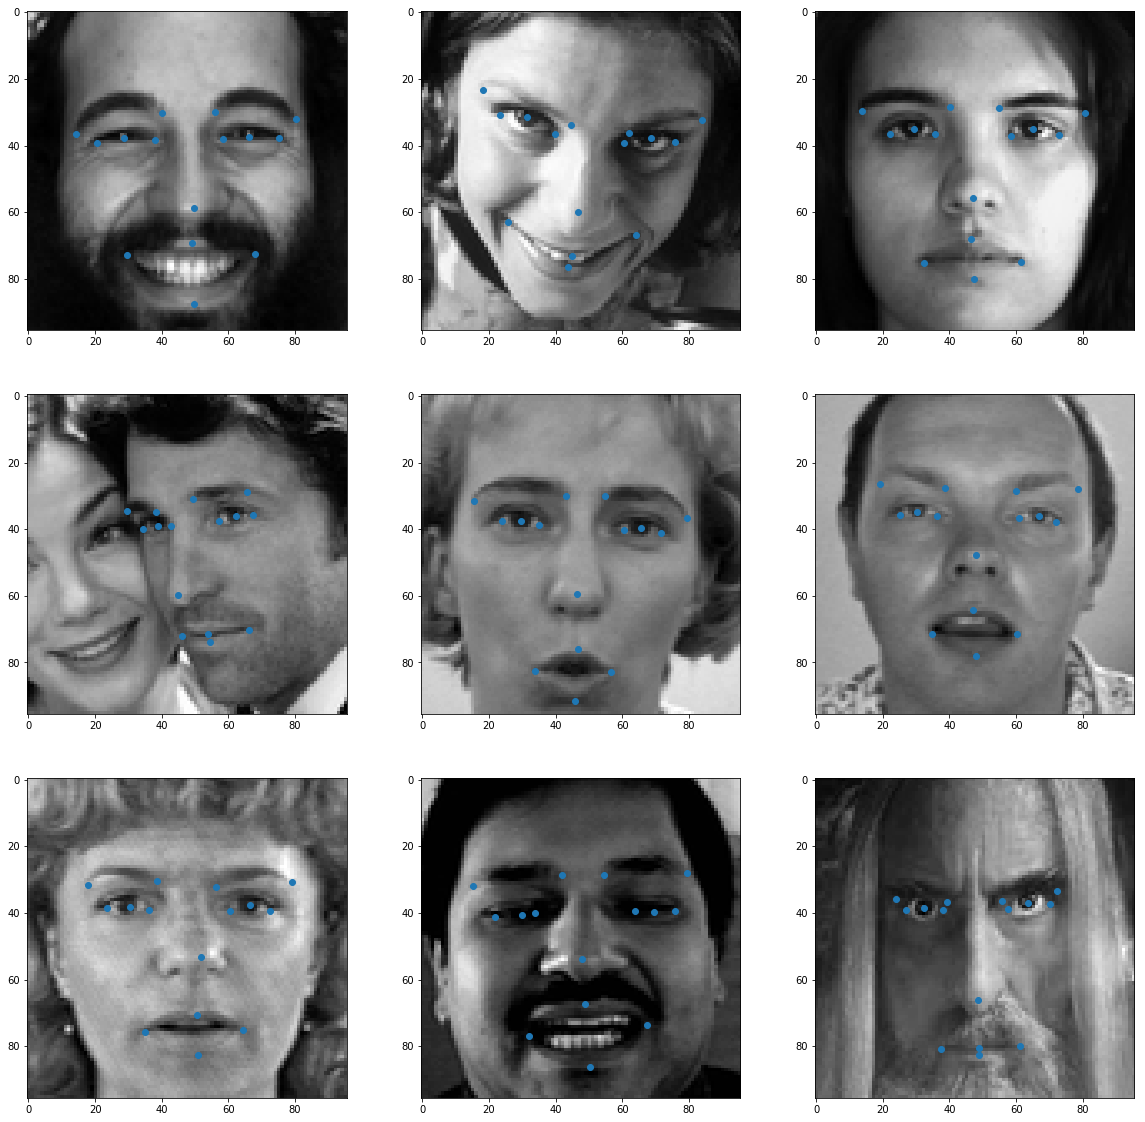

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    #print (y_train[i])
    
    plot_data(X_train[i], y_train[i], ax)

In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense


## TODO: Specify a CNN architecture
# Your model should accept 96x96 pixel graysale images in
# It should have a fully-connected output layer with 30 values (2 for each facial keypoint)

#model = Sequential()
model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(96,96,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(30))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       32896     
__________

In [5]:
from keras.optimizers import RMSprop

## TODO: Compile the model
model.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['accuracy'])

## TODO: Train the model
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64, verbose=1)

## TODO: Save the model as model.h5
model.save('my_model.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0564 - acc: 0.3084 - val_loss: 0.0137 - val_acc: 0.6963
Epoch 2/50
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0221 - acc: 0.3797 - val_loss: 0.0049 - val_acc: 0.6963
Epoch 3/50
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0148 - acc: 0.4737 - val_loss: 0.0124 - val_acc: 0.6963
Epoch 4/50
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0117 - acc: 0.5333 - val_loss: 0.0054 - val_acc: 0.6963
Epoch 5/50
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0092 - acc: 0.5730 - val_loss: 0.0045 - val_acc: 0.6963
Epoch 6/50
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0078 - acc: 0.5800 - val_loss: 0.0046 - val_acc: 0.6963
Epoch 7/50
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0070 - acc: 0.6221 - val_loss: 0.0046 - val_acc: 0.6963
Epoch 8/

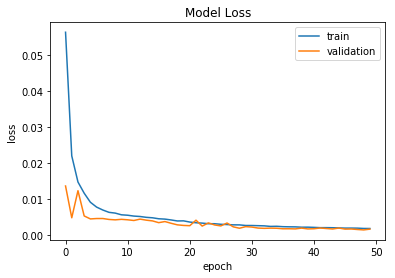

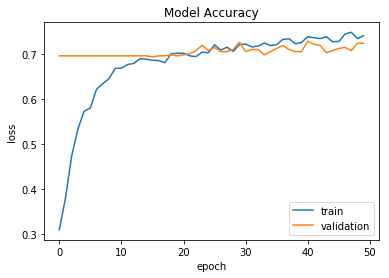

In [6]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

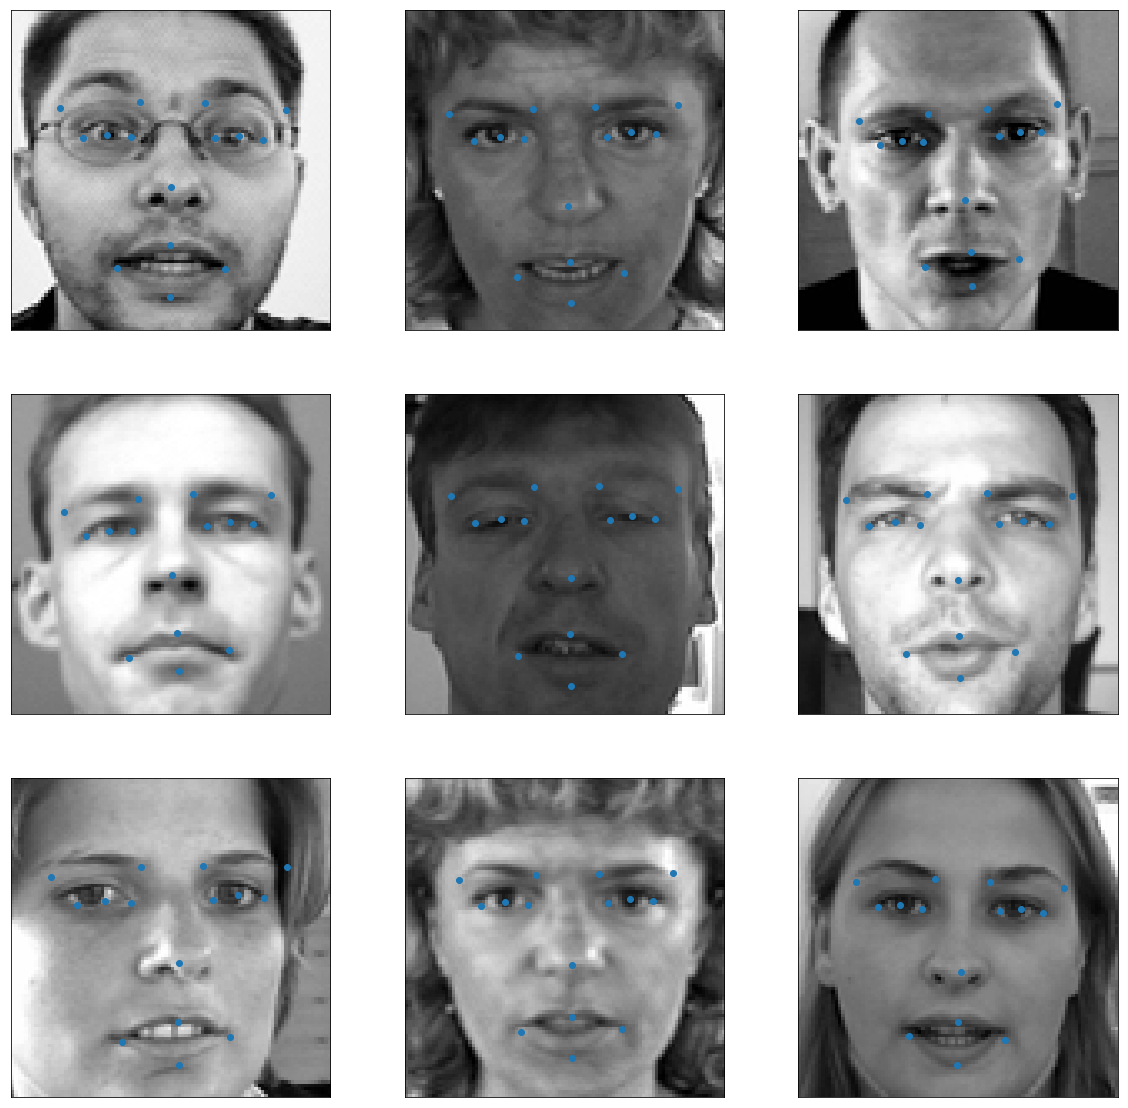

In [7]:
y_test = model.predict(X_test)
fig = plt.figure(figsize=(20,20))
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

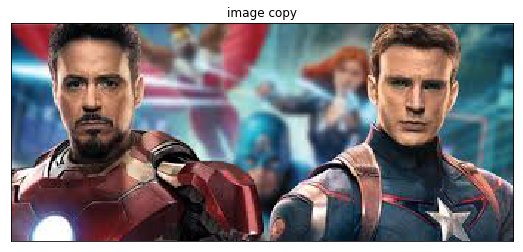

In [14]:
image = cv2.imread('images/avengers1.jpg')


# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image)

(1, 30)
(15,)
(15,)
(1, 30)
(15,)
(15,)
(1, 30)
(15,)
(15,)


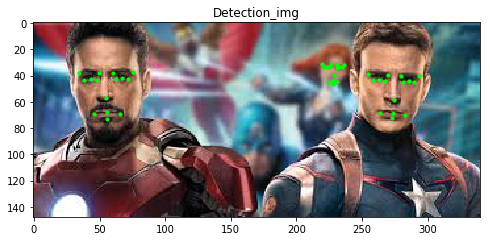

In [15]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
face_cascade = cv2.CascadeClassifier('xml_files/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray)
detection_img = np.copy(image)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_title('Detection_img')
ax1.imshow(detection_img)

for (x,y,w,h) in faces:
    
    cv2.rectangle(detection_img, (x,y), (x+w,y+h), (255,0,0),3)
    img=detection_img[y:y+h,x:x+w]
    k=img.shape
    img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img=cv2.resize(img, (96, 96))
    img=img/255
    img=np.expand_dims(img,axis=0)
    img=np.expand_dims(img,axis=3)
    landmark=model.predict(img)
    landmark = landmark * 48 + 48
    print (landmark.shape)
    #print (landmark[0][0::2].shape)
    landmark_x=landmark[0][0::2]*(k[0]/96)
    
    landmark_y=landmark[0][1::2]*(k[1]/96)
    print (landmark_x.shape)
    print (landmark_y.shape)
    ax1.scatter(landmark_x+x,landmark_y+y,c='#00FF00', s=10)
    